In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
x_train_f_regression = pd.read_csv('x_train_f_regression.csv')
y_train = pd.read_csv('y_train.csv')

In [39]:
#create constant variable and add to dataframe
new_x = sm.add_constant(x_train_f_regression)

In [40]:
new_x.head()

,const,Reports 1 day ago,Reports 2 days ago,Reports 3 days ago,Reports 4 days ago,Reports 5 days ago,Reports 6 days ago,Reports 7 days ago,Reports 14 days ago,Reports 30 days ago,Reports 365 days ago
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.013699,0.000000,0.000000
1,1.0,0.013699,0.000000,0.027397,0.041096,0.013699,0.041096,0.000000,0.000000,0.027397,0.025641
2,1.0,0.123288,0.082192,0.041096,0.013699,0.109589,0.178082,0.191781,0.041096,0.041096,0.076923
3,1.0,0.027397,0.041096,0.027397,0.054795,0.013699,0.013699,0.041096,0.000000,0.013699,0.012821
4,1.0,0.013699,0.041096,0.027397,0.013699,0.027397,0.013699,0.013699,0.000000,0.027397,0.000000


In [41]:
model = sm.OLS(y_train, new_x)

In [42]:
regression = model.fit()

In [43]:
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Todays Reports   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                 1.279e+04
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:26:55   Log-Likelihood:                -97551.
No. Observations:               43875   AIC:                         1.951e+05
Df Residuals:                   43864   BIC:                         1.952e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0767      0.013      6.103      0.000       0.052       0.101
Reports 1 day ago       12.2184      0.344     35.538      0.000      11.544      12.892
Reports 2 days ago       6.8283      0.347     19.695      0.000       6.149       7.508
Reports 3 days ago       7.0847      0.344     20.592      0.000       6.410       7.759
Reports 4 days ago       5.9951      0.350     17.105      0.000       5.308       6.682
Reports 5 days ago       5.6924      0.349     16.327      0.000       5.009       6.376
Reports 6 days ago       5.9989      0.347     17.289      0.000       5.319       6.679
Reports 7 days ago       6.9624      0.343     20.288      0.000       6.290       7.635
Reports 14 days ago      7.1736      0.337     21.316      0.000       6.514       7.833
Reports 30 days ago      5.4082      0.332     16.305      0.000       4.758       6.058
Reports 365 days ago     6.3774      0.305     20.923      0.000       5.780       6.975
==============================================================================
Omnibus:                    27117.156   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2175529.988
Skew:                           2.167   Prob(JB):                         0.00
Kurtosis:                      37.223   Cond. No.                         36.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

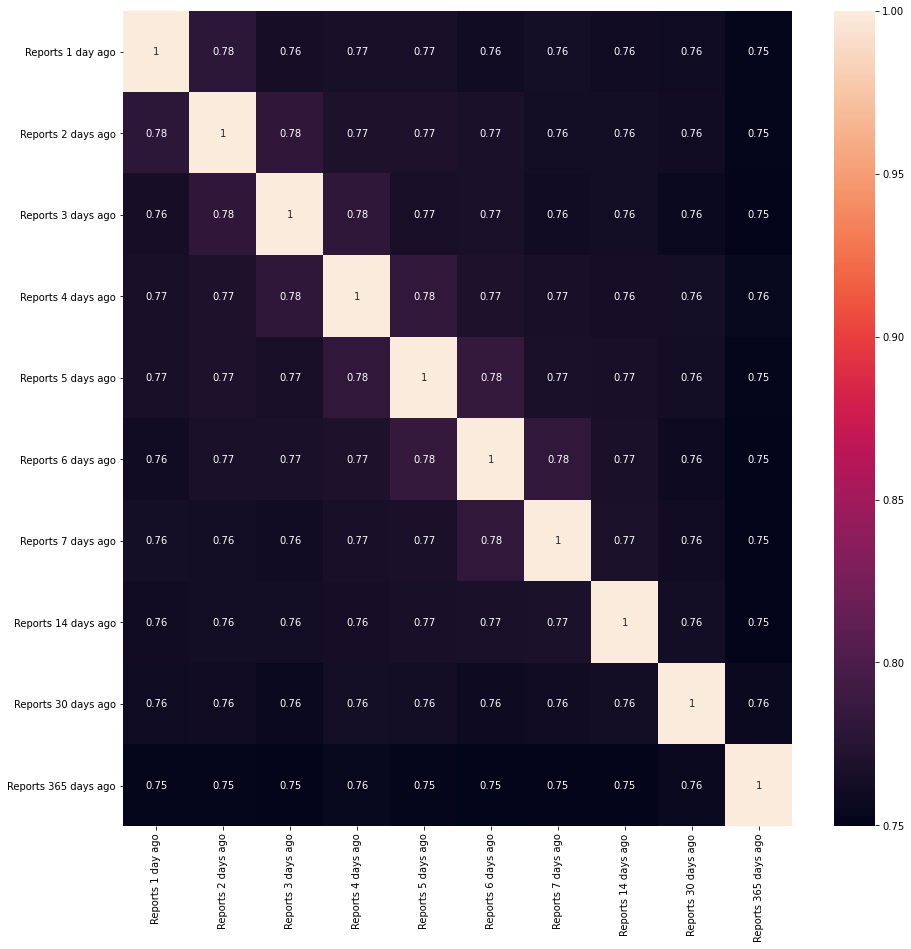

In [44]:
#Errors suggest strong mutlicollinearity, heatmap created to observe
corr_matrix = x_train_f_regression.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr_matrix, annot= True)
plt.show()